## Kmeans Algorithm Implementation from scratch

In [21]:
from matplotlib import pyplot as pl
import numpy as np
import pandas as pd
%matplotlib inline

This class is implementation of the KMeans algorithm. 
This algorithm first computes 'n' random centroids and then all the points nearest to each respective centroids 
are grouped under same cluster.
Then a new centroid is computed by setting the average value of all the points falling in that particular cluster.
The centroid updation is done until the new centroids are not distant apart.


In [100]:
class Kmeans(object):
    
    def __init__(self,n_clusters=3,tolerance=0.0001,max_iterations=500):
        '''
            We have set the tolerance here so that the centroid updation is made only till the distance change %
            between old and updated centroid is greater than the tolerance value.
        '''
        self.k=n_clusters # number of distinct classes
        self.tolerance=tolerance
        self.max_iterations=max_iterations
    
    def fit(self,data):
        
        self.centroids={}
        
        #initialising centroids
        for i in xrange(self.k):
            self.centroids[i] = data[i]
       
        
        for j in xrange(self.max_iterations):
            
            self.classes={} #This dictionary maintains each point into its respective class after distance calculation.
            
            for i in xrange(self.k):
                self.classes[i]=[] #initialising 'K' classes.
            
            
       
            for features in data:
                distance=[np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                cluster=distance.index(min(distance))
                self.classes[cluster].append(features)
            
            original_centroids=dict(self.centroids) #maintaining a list of original centroids
            
            #updating the centroid value
            for clusters in self.classes:
                self.centroids[clusters]=np.average(self.classes[clusters],axis=0) 
            
            #A boolean value to maintain check on terminal condition
            isOptimal=True
            
            
            for centroid in self.centroids:
                    original_centroid=original_centroids[centroid]
                    current_centroid=self.centroids[centroid]
                    
                    if np.sum((current_centroid-original_centroid)/original_centroid*100)>self.tolerance:
                        isOptimal=False
                
            if isOptimal:
                break
                

    #Function for plotting the clustered data   
    def Plot_clusters(self):
        
        colors=10*['r','g','Y','c','b']
        for centroid in self.centroids:
            pl.scatter(self.centroids[centroid][0],self.centroids[centroid][1],s=130,marker='o')
    
        for classification in self.classes:
            color=colors[classification]
            for features in self.classes[classification]:
                pl.scatter(features[0],features[1],color=color,s=30)
    
    pl.show()


In [101]:
def main():
    #loading the normalised data
    df=pd.read_csv('normal_data.csv')
    X=df.values    
    
    km=Kmeans(n_clusters=3)
    km.fit(X)
    km.Plot_clusters()
    

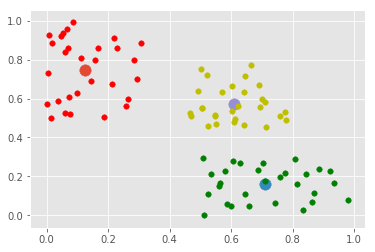

In [102]:
if __name__=="__main__":
    main()